In [461]:
import yt
import matplotlib
import matplotlib.pyplot as plt
import shutil
import numpy
import matplotlib.style
from mpl_toolkits.axes_grid1 import AxesGrid

def Load(path):
    p = '{}/'.format(path)
    shutil.copy2('extra/yt/WarpXHeader', p)
    shutil.copy2('extra/yt/warpx_job_info', p)
    return yt.load(p)


n_cycles = 5

base_names = ['build/BK19_Pseudo_Incompressible-pre-step', 
              'build/BK19_Pseudo_Incompressible-advect',
              'build/BK19_Pseudo_Incompressible-advect-backward',
              'build/BK19_Pseudo_Incompressible-advect-backward-forward',
              'build/BK19_Pseudo_Incompressible-advect-backward-forward-advect',
              'build/BK19_Pseudo_Incompressible-advect-backward-forward-advect-backward']
timeseries = ['plt{:09d}'.format(i) for i in range(0, n_cycles)]
    
paths = ['{}/{}'.format(base_name, timeseries[1]) for base_name in base_names]

def PlotVariables(path):
    ds = Load(path)
    variables = ['Density', 'PTdensity', 'Velocity_0', 'Velocity_1']
    fig = plt.figure()
    grid = AxesGrid(fig, (0, 0, 1.0, 1.0),
                    nrows_ncols = (2, 2), 
                    axes_pad = 1.0,
                    cbar_mode = 'each',
                    cbar_location = 'right')
    p = yt.SlicePlot(ds, 'z', variables, origin='native')
    for i, var in enumerate(variables):
        p.set_log(var, False)
        p.set_cmap(var, 'Blue-Red')
        plot = p.plots[var]
        plot.figure = fig
        plot.axes = grid[i].axes
        plot.cax = grid.cbar_axes[i]
    # plots.set_figure_size(4)
    
    p._setup_plots()

yt : [INFO     ] 2020-01-15 16:30:28,011 Parameters: current_time              = 0.011432157576986585
yt : [INFO     ] 2020-01-15 16:30:28,012 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2020-01-15 16:30:28,014 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-15 16:30:28,017 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-15 16:30:28,334 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:30:28,334 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:30:28,336 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:30:28,338 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:30:28,340 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-15 16:30:28,357 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-15 16:30:28,369 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

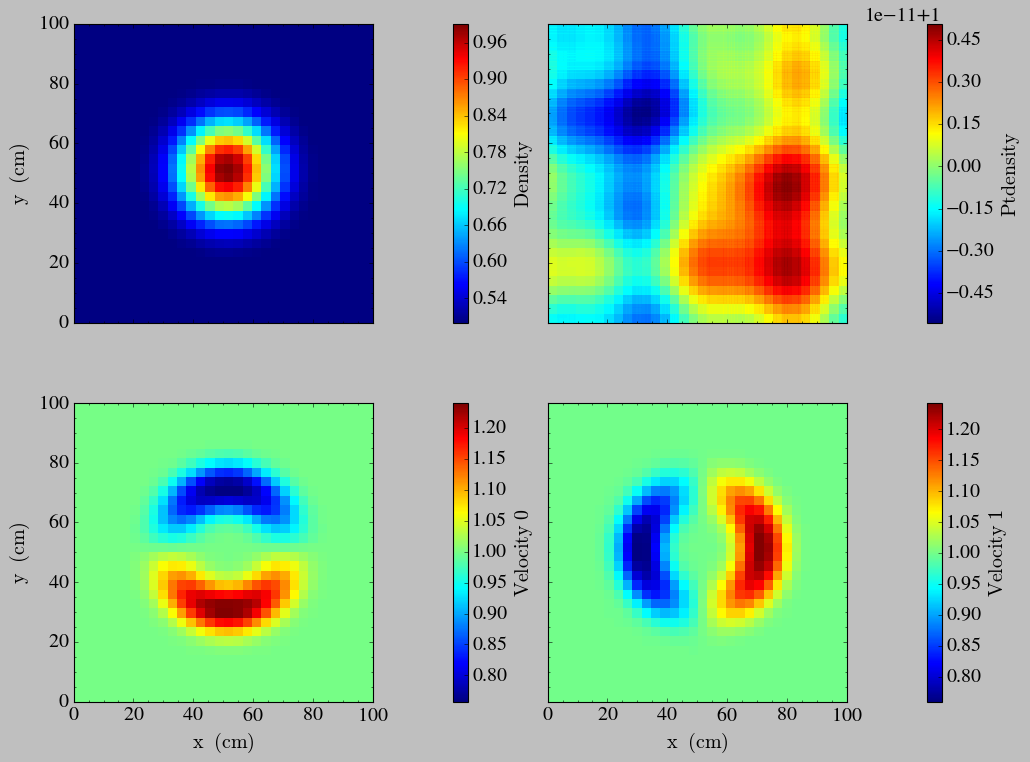

In [464]:
PlotVariables(paths[0])

yt : [INFO     ] 2020-01-15 16:30:34,266 Parameters: current_time              = 0.011432157576986585
yt : [INFO     ] 2020-01-15 16:30:34,267 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2020-01-15 16:30:34,269 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-15 16:30:34,277 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-15 16:30:34,601 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:30:34,602 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:30:34,604 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:30:34,605 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:30:34,609 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-15 16:30:34,621 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-15 16:30:34,638 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

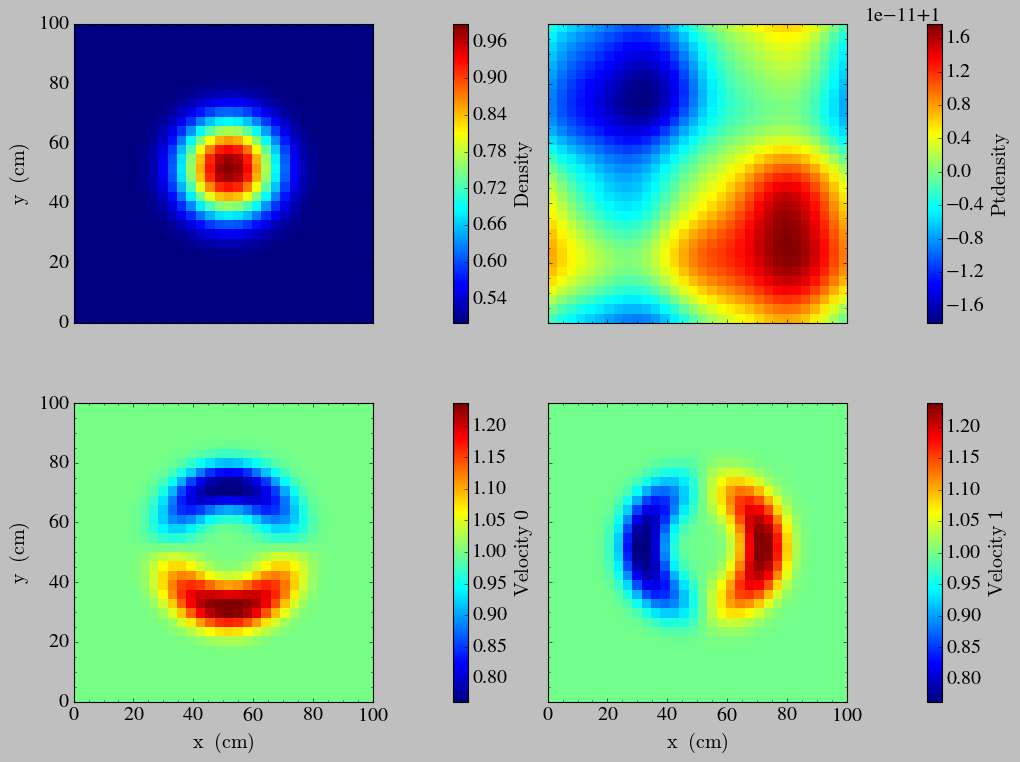

In [465]:
PlotVariables(paths[1])

yt : [INFO     ] 2020-01-15 16:33:28,672 Parameters: current_time              = 0.011432157576986585
yt : [INFO     ] 2020-01-15 16:33:28,675 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2020-01-15 16:33:28,678 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-15 16:33:28,680 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-15 16:33:29,549 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:29,550 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:29,562 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:29,573 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:29,591 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-15 16:33:29,616 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-15 16:33:29,650 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

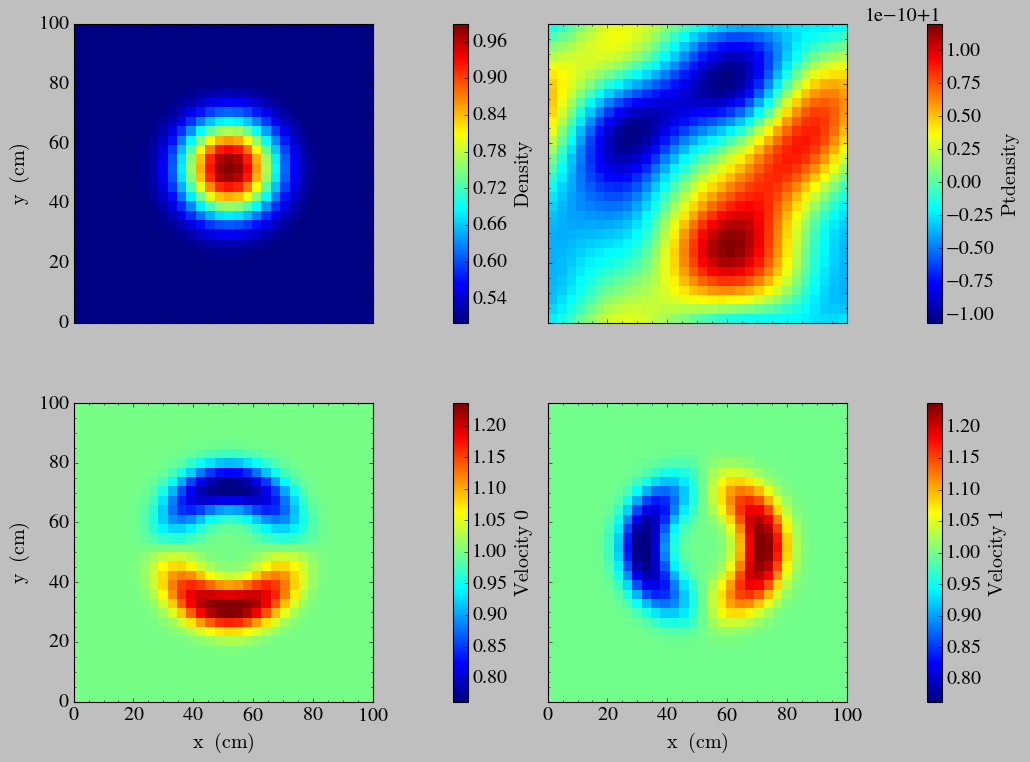

In [467]:
PlotVariables(paths[2])

yt : [INFO     ] 2020-01-15 16:33:37,175 Parameters: current_time              = 0.011432157576986585
yt : [INFO     ] 2020-01-15 16:33:37,182 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2020-01-15 16:33:37,195 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-15 16:33:37,204 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-15 16:33:38,612 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:38,619 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:38,629 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:38,637 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:38,654 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-15 16:33:38,694 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-15 16:33:38,716 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

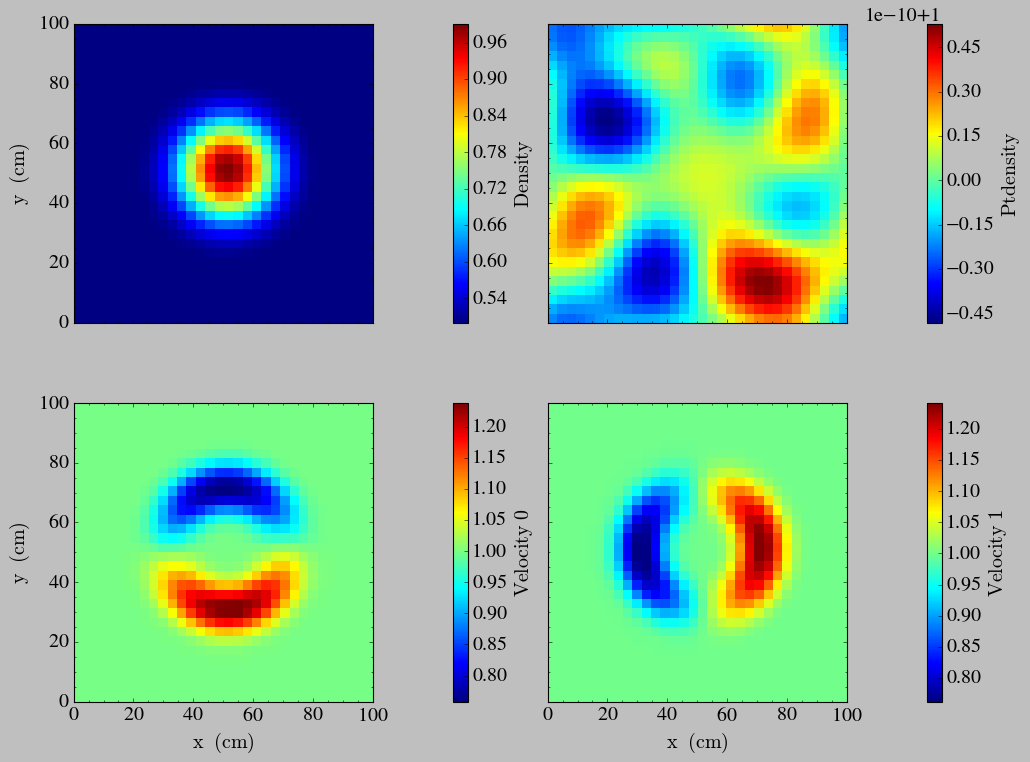

In [468]:
PlotVariables(paths[3])

yt : [INFO     ] 2020-01-15 16:33:44,486 Parameters: current_time              = 0.011432157576986585
yt : [INFO     ] 2020-01-15 16:33:44,490 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2020-01-15 16:33:44,495 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-15 16:33:44,500 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-15 16:33:45,078 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:45,080 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:45,086 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:45,087 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:45,093 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-15 16:33:45,133 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-15 16:33:45,151 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

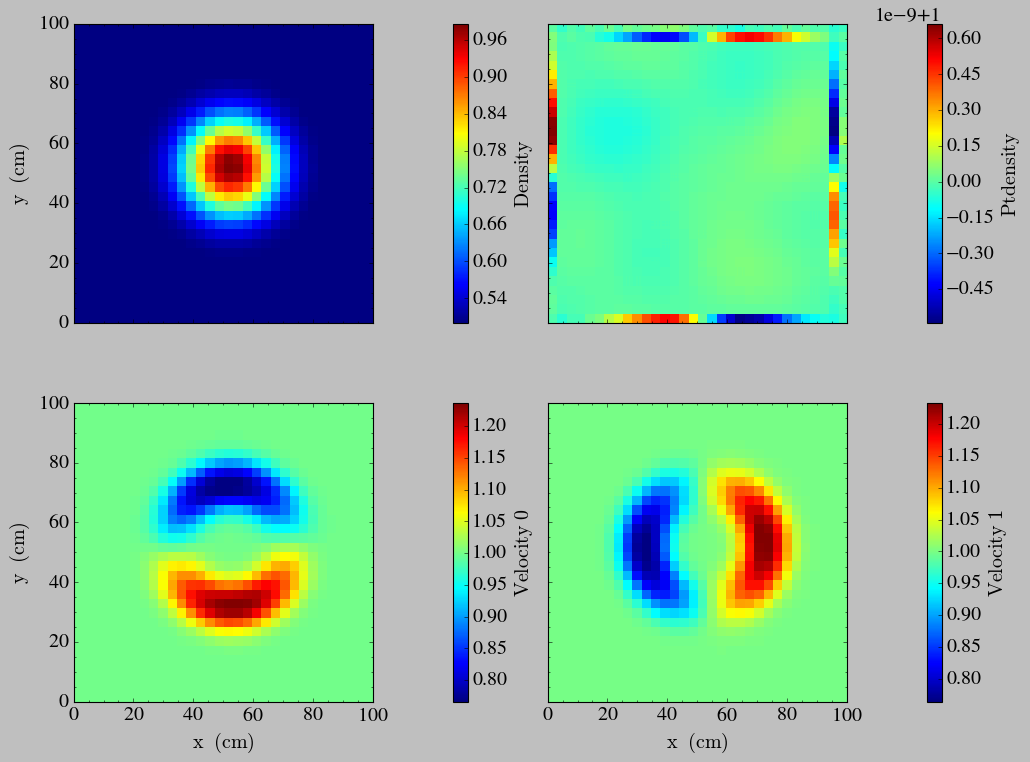

In [469]:
PlotVariables(paths[4])

yt : [INFO     ] 2020-01-15 16:33:51,281 Parameters: current_time              = 0.011432157576986585
yt : [INFO     ] 2020-01-15 16:33:51,283 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2020-01-15 16:33:51,289 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-15 16:33:51,293 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-15 16:33:51,988 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:51,995 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:52,001 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:52,005 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-15 16:33:52,013 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-15 16:33:52,048 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-15 16:33:52,068 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

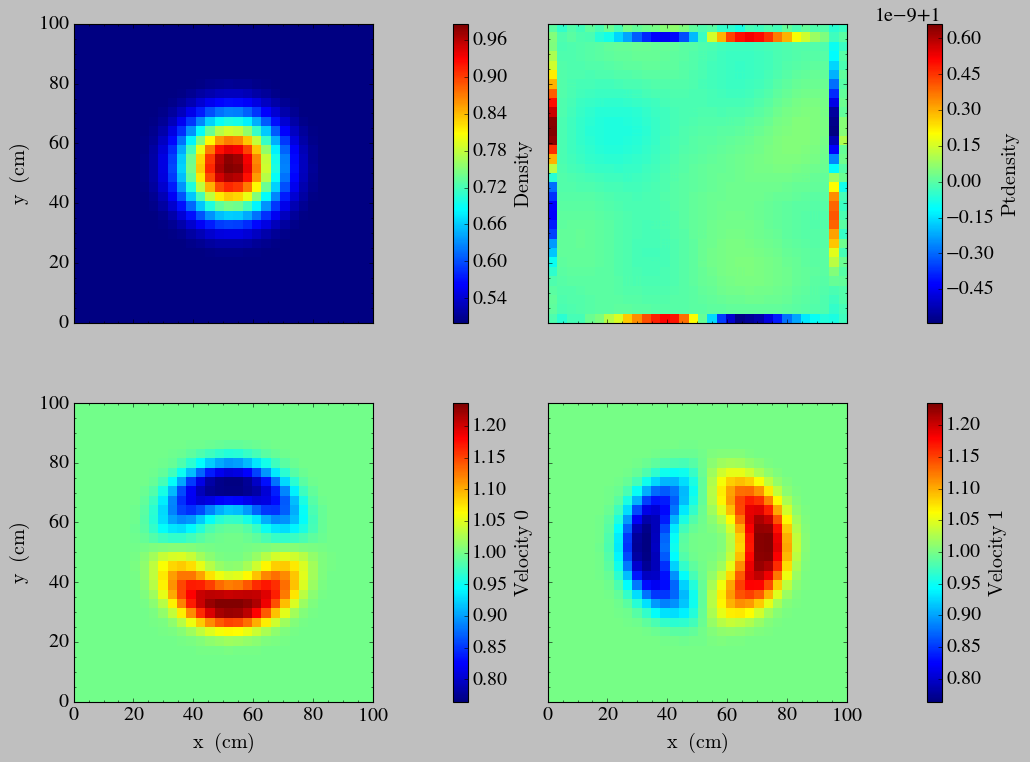

In [470]:
PlotVariables(paths[5])

yt : [INFO     ] 2020-01-15 16:33:56,102 Parameters: current_time              = 0.011432157576986585
yt : [INFO     ] 2020-01-15 16:33:56,104 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2020-01-15 16:33:56,106 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-15 16:33:56,108 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-15 16:33:56,149 Parameters: current_time              = 0.011432157576986585
yt : [INFO     ] 2020-01-15 16:33:56,150 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2020-01-15 16:33:56,152 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-15 16:33:56,155 Parameters: domain_right_edge         = [1. 1. 1.]


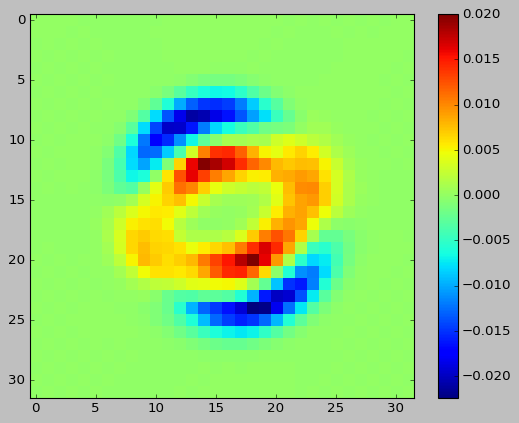

In [471]:
ds0 = yt.load(paths[0])
ds1 = yt.load(paths[1])
grid0 = ds0.covering_grid(level=0, left_edge=(0.0, 0.0, 0.0), dims=ds.domain_dimensions)
grid1 = ds1.covering_grid(level=0, left_edge=(0.0, 0.0, 0.0), dims=ds.domain_dimensions)
u0 = numpy.array(grid0['Velocity_0'])
u1 = numpy.array(grid1['Velocity_0'])
du = u1 - u0
matplotlib.pyplot.imshow(du[:,:,0].transpose(), interpolation='none')
matplotlib.pyplot.colorbar()